In [67]:
# Librerías básicas

import pandas as pd
import pickle
import pandas as pd
import numpy as np
import yaml
import os
import pickle

# Librerías Machine Learning 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Librerías Model Selection y evaluación
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Librerías features transformación 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel

In [50]:
# Ruta del archivo CSV
ruta_archivo = 'datos/df_desordenado.csv'

# Leer el archivo CSV
df = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del DataFrame
print(df.head())

   Año de nacimiento  Comunidad  Género  Bebida  Tapa
0               1944          3       2       4     5
1               1995          9       1       1    12
2               1940          1       2       2     9
3               1972          8       1       2    14
4               1936         11       2       6     3


In [32]:
# Reemplazar un nombre de columna específico
df.columns = df.columns.str.replace('Año de nacimiento', 'Año_de_nacimiento')

In [34]:
# Train test split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805 entries, 29 to 102
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Año_de_nacimiento  805 non-null    int64
 1   Comunidad          805 non-null    int64
 2   Género             805 non-null    int64
 3   Bebida             805 non-null    int64
 4   Tapa               805 non-null    int64
dtypes: int64(5)
memory usage: 37.7 KB


In [35]:
# Target
target = 'Tapa'

In [36]:
# Features
features = ['Año_de_nacimiento','Comunidad','Género','Bebida']

In [37]:
# Aplicar LabelEncoder a features categoricas
train_set_encoded = train_set.copy()
test_set_encoded = test_set.copy()


for feature in features:
    all_values = pd.concat([train_set[feature], test_set[feature]], axis=0).unique()
    label_encoder = LabelEncoder()
    label_encoder.fit(all_values)
    train_set_encoded[feature] = label_encoder.transform(train_set[feature])
    test_set_encoded[feature] = label_encoder.transform(test_set[feature])


# Mostrar los DataFrames codificados
print(train_set_encoded.head())
# print(test_set_encoded.head())

     Año_de_nacimiento  Comunidad  Género  Bebida  Tapa
29                  16         13       1       3     8
280                 48         16       0       0     3
507                 26          9       0       0     8
652                  6          6       0       4     9
947                  8         18       1       3     2


In [38]:
# x y train/test
X_train = train_set_encoded.drop(columns=['Tapa'])
y_train = train_set_encoded['Tapa']
X_test = test_set_encoded.drop(columns=['Tapa'])
y_test = test_set_encoded['Tapa']

In [56]:
# Definir los modelos
modelos = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=10, random_state=42)
}

# Definir los hiperparámetros para cada modelo
parametros = {
    "Gradient Boosting": {
        'max_depth': [3,5,10],
        'n_estimators': [10,50, 100]
    },
    "Random Forest": {
        'max_depth': [3,5,10],
        'n_estimators': [150, 200]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7]
    },
    "Decision Tree Classifier": {
        'max_depth': [10, 15, 20],
        'min_samples_split': [1, 2, 5]
    }
}

In [57]:
# Realizar validación cruzada y calcular balanced_accuracy
for tipo, modelo in modelos.items():
    print(f"{tipo}: ", end=" ")
    scores = cross_val_score(modelo, X_train, y_train, cv=3, scoring="balanced_accuracy")
    print(np.mean(scores).round(2))
print("******")

Gradient Boosting:  

c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


0.66
Random Forest:  

c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2466: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.66
KNN:  0.3
Decision Tree Classifier:  0.64
******


c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2466: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [58]:
# Grid Search
resultados = {}
for nombre_modelo, modelo in modelos.items():
    print(f"Entrenando modelo: {nombre_modelo}")
    grid_search = GridSearchCV(estimator=modelo, param_grid=parametros[nombre_modelo], cv=3, n_jobs=-1, scoring='r2')
    grid_search.fit(X_train, y_train)
    print(f"Mejores parámetros para {nombre_modelo}: {grid_search.best_params_}")
    print(f"Mejor score para {nombre_modelo}: {grid_search.best_score_}")
    resultados[nombre_modelo] = grid_search.best_estimator_

# Imprimir los mejores modelos y sus parámetros
for nombre_modelo, mejor_modelo in resultados.items():
    print(f"Mejor modelo para {nombre_modelo}: {mejor_modelo}")

Entrenando modelo: Gradient Boosting


c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Mejores parámetros para Gradient Boosting: {'max_depth': 5, 'n_estimators': 50}
Mejor score para Gradient Boosting: 0.5444078396433525
Entrenando modelo: Random Forest


c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Mejores parámetros para Random Forest: {'max_depth': 10, 'n_estimators': 200}
Mejor score para Random Forest: 0.4691508674945413
Entrenando modelo: KNN
Mejores parámetros para KNN: {'n_neighbors': 5}
Mejor score para KNN: -0.27245835408164126
Entrenando modelo: Decision Tree Classifier


c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 27.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  Fi

Mejores parámetros para Decision Tree Classifier: {'max_depth': 15, 'min_samples_split': 2}
Mejor score para Decision Tree Classifier: 0.4067227457690665
Mejor modelo para Gradient Boosting: GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=42)
Mejor modelo para Random Forest: RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)
Mejor modelo para KNN: KNeighborsClassifier()
Mejor modelo para Decision Tree Classifier: DecisionTreeClassifier(max_depth=15, random_state=42)


In [61]:
# Crear el modelo con los mejores parámetros encontrados
modelo_seleccionado = GradientBoostingClassifier(max_depth=15, min_samples_leaf=2, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
modelo_seleccionado.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_seleccionado.predict(X_test)

In [73]:
#  Tener classification report
labels = np.arange(16)  # Reemplaza 16 con el número total de clases para que aparezcan 0 y 1 aunque no tengan instancias de esta label en test
print(classification_report(y_test, y_pred, labels=labels))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.67      0.80         9
           3       0.77      0.81      0.79        21
           4       0.00      0.00      0.00         2
           5       0.92      0.79      0.85        14
           6       0.61      0.58      0.59        19
           7       0.87      0.83      0.85        24
           8       0.71      0.87      0.78        23
           9       1.00      0.88      0.94        17
          10       0.57      0.80      0.67         5
          11       1.00      0.62      0.77         8
          12       0.88      0.84      0.86        25
          13       0.79      0.94      0.86        16
          14       0.69      0.90      0.78        10
          15       0.62      0.56      0.59         9

    accuracy                           0.79       202
   macro avg       0.65   

c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mfm-8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

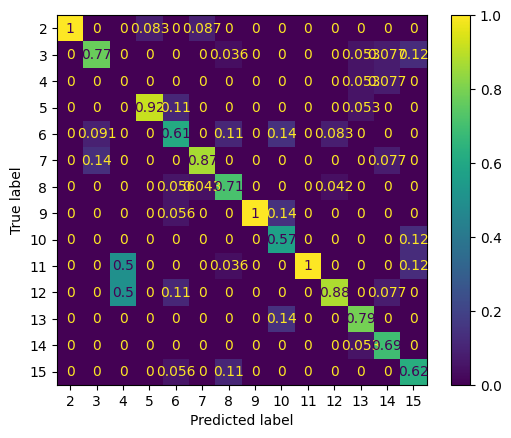

In [69]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize= "pred")

In [ ]:
# Definir el directorio y la ruta del archivo
models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

results_file_path = os.path.join(models_dir, 'modelo.pkl')

# Guardar el modelo en un archivo
with open(results_file_path, 'wb') as file:
    pickle.dump(modelo_seleccionado, file)

print(f"Modelo guardado en {results_file_path}")

In [71]:
# Definir el directorio y la ruta del archivo
models_dir = 'modelo_entrenado'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

results_file_path = os.path.join(models_dir, 'modelo.pkl')

# Guardar el modelo en un archivo
with open(results_file_path, 'wb') as file:
    pickle.dump(modelo_seleccionado, file)

print(f"Modelo guardado en {results_file_path}")

Modelo guardado en modelo_entrenado\modelo.pkl
